In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
boost_df = pd.read_csv('data/boost_df.csv')

In [3]:
boost_df.head()

,trip_id,timestamp,boost_number,boost_amount,base_plus_boost,claimed,total_price,base_price,total_driver_supply,metro_area,trip_start_date
0,1,2022-12-30 12:00:00,0,0.00,10.00,0,10.00,10.0,202,SFO,2023-01-01 00:00:00
1,1,2022-12-30 12:05:00,1,1.76,11.76,0,11.76,10.0,263,SFO,2023-01-01 00:00:00
2,1,2022-12-30 12:10:00,2,2.04,12.04,0,13.80,10.0,203,SFO,2023-01-01 00:00:00
3,1,2022-12-30 12:15:00,3,1.78,11.78,1,15.58,10.0,201,SFO,2023-01-01 00:00:00
4,2,2022-12-30 13:00:00,0,0.00,35.00,0,35.00,35.0,242,ATL,2023-01-01 01:00:00


In [4]:
boost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119835 entries, 0 to 119834
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              119835 non-null  int64  
 1   timestamp            119835 non-null  object 
 2   boost_number         119835 non-null  int64  
 3   boost_amount         119835 non-null  float64
 4   base_plus_boost      119835 non-null  float64
 5   claimed              119835 non-null  int64  
 6   total_price          119835 non-null  float64
 7   base_price           119835 non-null  float64
 8   total_driver_supply  119835 non-null  int64  
 9   metro_area           119835 non-null  object 
 10  trip_start_date      119835 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 10.1+ MB


In [5]:
boost_df.describe()

,trip_id,boost_number,boost_amount,base_plus_boost,claimed,total_price,base_price,total_driver_supply
count,119835.000000,119835.000000,119835.000000,119835.000000,119835.000000,119835.000000,119835.000000,119835.000000
mean,10008.402337,3.333726,1.561345,24.632614,0.151225,29.316880,23.071269,210.210264
std,5787.893123,2.687680,0.753793,13.273656,0.358269,14.203886,13.251414,159.452362
min,1.000000,0.000000,0.000000,10.000000,0.000000,10.000000,10.000000,72.000000
25%,4994.000000,1.000000,1.600000,13.940000,0.000000,17.670000,12.000000,126.000000
50%,10014.000000,3.000000,1.740000,17.770000,0.000000,25.280000,16.000000,166.000000
75%,15043.000000,5.000000,1.930000,36.610000,0.000000,38.565000,35.000000,222.000000
max,20000.000000,10.000000,7.120000,54.780000,1.000000,72.340000,48.500000,899.000000


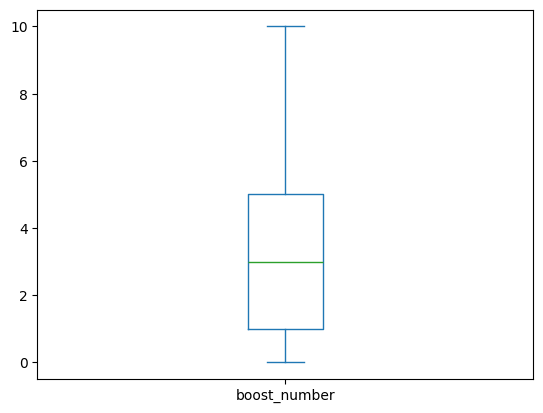

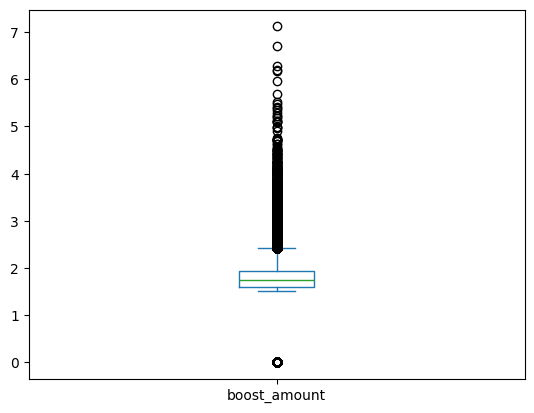

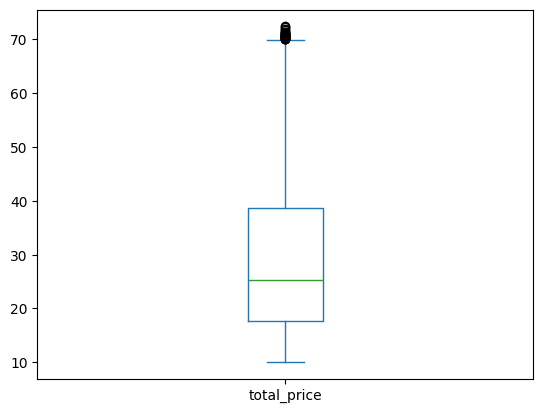

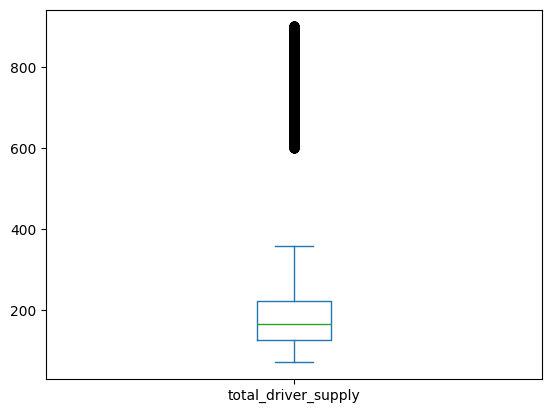

In [6]:
for col in ['boost_number', 'boost_amount', 'total_price', 'total_driver_supply']:
    boost_df[col].plot(kind='box')
    plt.show()

In [7]:
boost_df[['trip_id', 'boost_number', 'metro_area']].groupby('trip_id').max().groupby('metro_area').mean()

,boost_number
metro_area,
ATL,5.082445
DEN,4.951773
DET,5.094822
DFW,5.109851
LAS,4.889706
LAX,4.994173
MCL,5.045175
MSP,4.839185
NYC,4.989422


In [8]:
claimed_df = boost_df[boost_df['claimed']==1]

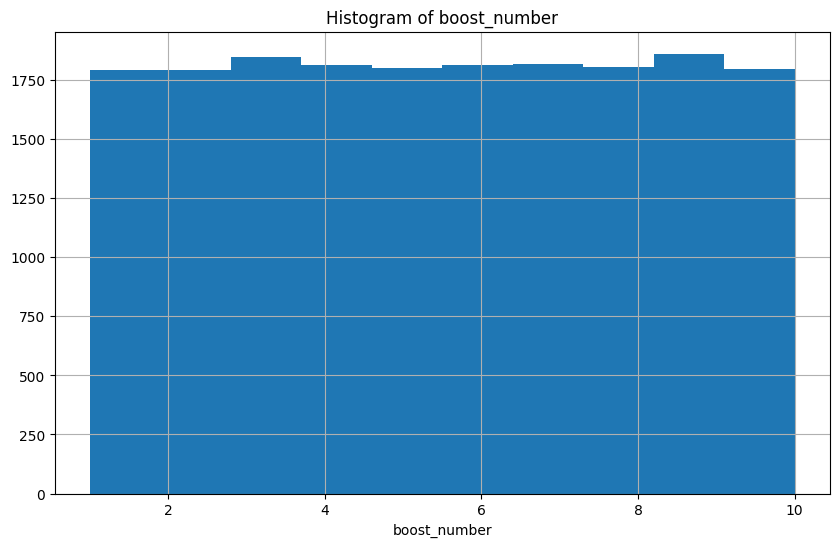

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(claimed_df['boost_number'])
plt.xlabel('boost_number')
plt.title(f'Histogram of boost_number')
plt.grid(True)
plt.show()

As pictured in the table and figure above, we have close to 5 boosts, on average, for each metro area, and we have an even distribution of the numbers of boosts - averaging out to 5 - for all claimed rides.

<Axes: >

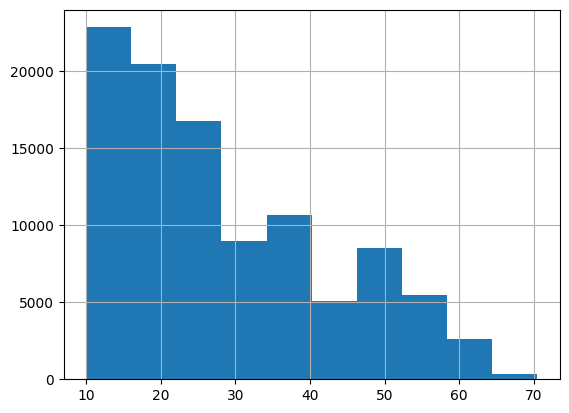

In [10]:
boost_df[boost_df['claimed']==0]['total_price'].hist()

In [11]:
boost_df[boost_df['claimed']==0]['total_price'].mean()

28.599687847177847

<Axes: >

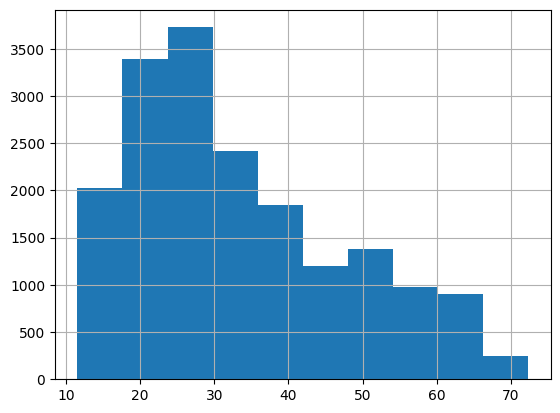

In [12]:
boost_df[boost_df['claimed']==1]['total_price'].hist()

In [13]:
boost_df[boost_df['claimed']==1]['total_price'].mean()

33.34225030349851

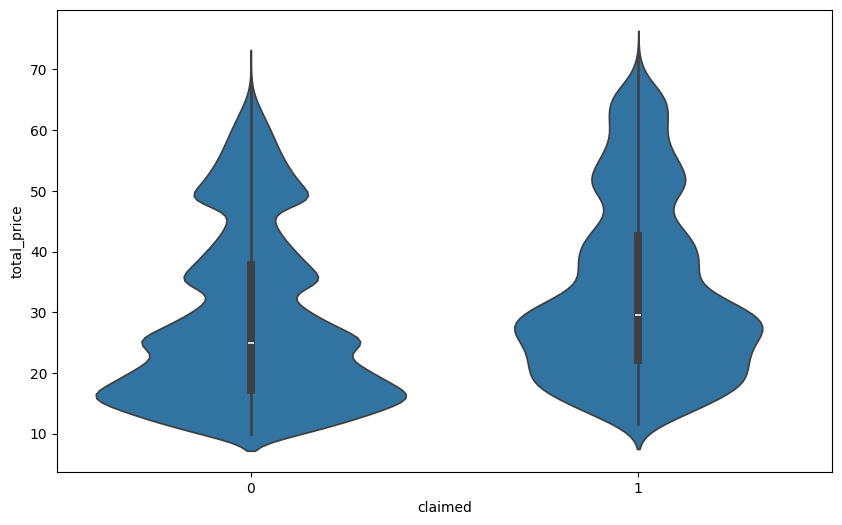

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='claimed', y='total_price', data=boost_df[['claimed', 'total_price']])
plt.show()

As we can see in the figures above, the total price is about 5 to 10 \$ higher on average for claimed rides

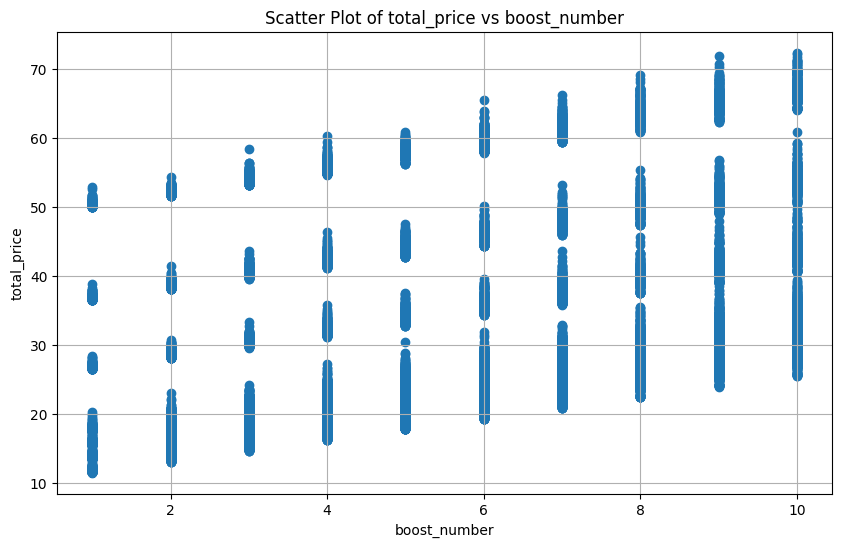

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(claimed_df['boost_number'], claimed_df['total_price'])
plt.xlabel('boost_number')
plt.ylabel('total_price')
plt.title(f'Scatter Plot of total_price vs boost_number')
plt.grid(True)
plt.show()

In [16]:
boost_df['claimed_next'] = boost_df.groupby('trip_id')['claimed'].shift(-1)
boost_df['claimed_next'] = boost_df['claimed_next'].fillna(1)
boost_df['previous_total_price'] = boost_df.groupby('trip_id')['total_price'].shift(1)
boost_df['boost_lag1'] = boost_df.groupby('trip_id')['boost_amount'].shift(1)
boost_df['boost_lag2'] = boost_df.groupby('trip_id')['boost_amount'].shift(2)

In [17]:
boost_df['timestamp'] = pd.to_datetime(boost_df['timestamp'])
boost_df['trip_start_date'] = pd.to_datetime(boost_df['trip_start_date'])

# trip day of week
boost_df['day_of_week'] = boost_df['trip_start_date'].dt.dayofweek

# trip time of day
boost_df['hour_of_day'] = boost_df['trip_start_date'].dt.hour
boost_df['hour_sin'] = np.sin(2 * np.pi * boost_df['hour_of_day'] / 24)
boost_df['hour_cos'] = np.cos(2 * np.pi * boost_df['hour_of_day'] / 24)

# time until trip
boost_df['time_to_ride_start'] = (boost_df['trip_start_date'] - boost_df['timestamp']).dt.total_seconds() / 3600

# Handle categorical values
boost_df = pd.get_dummies(boost_df, columns=['metro_area', 'day_of_week'], drop_first=True, dtype=int)

In [18]:
train = boost_df[boost_df['trip_id']<=15000]
test = boost_df[boost_df['trip_id']>15000]

In [19]:
boost_df.columns

Index(['trip_id', 'timestamp', 'boost_number', 'boost_amount',
       'base_plus_boost', 'claimed', 'total_price', 'base_price',
       'total_driver_supply', 'trip_start_date', 'claimed_next',
       'previous_total_price', 'boost_lag1', 'boost_lag2', 'hour_of_day',
       'hour_sin', 'hour_cos', 'time_to_ride_start', 'metro_area_DEN',
       'metro_area_DET', 'metro_area_DFW', 'metro_area_LAS', 'metro_area_LAX',
       'metro_area_MCL', 'metro_area_MSP', 'metro_area_NYC', 'metro_area_PDX',
       'metro_area_SDF', 'metro_area_SFO', 'metro_area_STL', 'metro_area_TPA',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [20]:
boost_df.to_csv('data/timeseries_dataset.csv', index=False)

In [21]:
drop_columns = ['trip_id', 'timestamp', 'base_plus_boost', 'claimed', 'trip_start_date', 'hour_of_day', 'boost_number']

target = 'claimed_next'
features = [x for x in boost_df.columns.to_list() if (x not in drop_columns and x not in target)]


model = RandomForestClassifier(random_state=42)
model.fit(train[features], train[target])

test['predicted_proba'] = model.predict_proba(test[features])[:, 1]

/var/folders/_w/zd567b3j2b1cy6h7nmg6cnxh0000gp/T/ipykernel_87379/696817386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_proba'] = model.predict_proba(test[features])[:, 1]


In [22]:
test[['claimed_next','predicted_proba']]

,claimed_next,predicted_proba
89627,0.0,0.44
89628,0.0,0.17
89629,0.0,0.28
89630,0.0,0.27
89631,0.0,0.27
...,...,...
119830,1.0,0.44
119831,0.0,0.29
119832,0.0,0.13
119833,1.0,0.22


In [23]:
test[test['trip_id']==15003][['trip_id'] + features + ['predicted_proba', 'claimed_next','claimed']]

,trip_id,boost_amount,total_price,base_price,total_driver_supply,previous_total_price,boost_lag1,boost_lag2,hour_sin,hour_cos,...,metro_area_TPA,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,predicted_proba,claimed_next,claimed
89646,15003,0.00,12.00,12.0,285,NaN,NaN,NaN,0.5,0.866025,...,0,1,0,0,0,0,0,0.03,0.0,0
89647,15003,1.64,13.64,12.0,262,12.00,0.00,NaN,0.5,0.866025,...,0,1,0,0,0,0,0,0.16,0.0,0
89648,15003,1.69,15.33,12.0,285,13.64,1.64,0.00,0.5,0.866025,...,0,1,0,0,0,0,0,0.14,0.0,0
89649,15003,1.58,16.91,12.0,245,15.33,1.69,1.64,0.5,0.866025,...,0,1,0,0,0,0,0,0.17,0.0,0
89650,15003,1.60,18.51,12.0,249,16.91,1.58,1.69,0.5,0.866025,...,0,1,0,0,0,0,0,0.42,0.0,0
89651,15003,1.66,20.17,12.0,276,18.51,1.60,1.58,0.5,0.866025,...,0,1,0,0,0,0,0,0.41,0.0,0
89652,15003,1.71,21.88,12.0,269,20.17,1.66,1.60,0.5,0.866025,...,0,1,0,0,0,0,0,0.40,0.0,0
89653,15003,1.57,23.45,12.0,215,21.88,1.71,1.66,0.5,0.866025,...,0,1,0,0,0,0,0,0.34,1.0,0
89654,15003,1.90,25.35,12.0,252,23.45,1.57,1.71,0.5,0.866025,...,0,1,0,0,0,0,0,0.68,1.0,1


In [24]:
feature_importances = model.feature_importances_

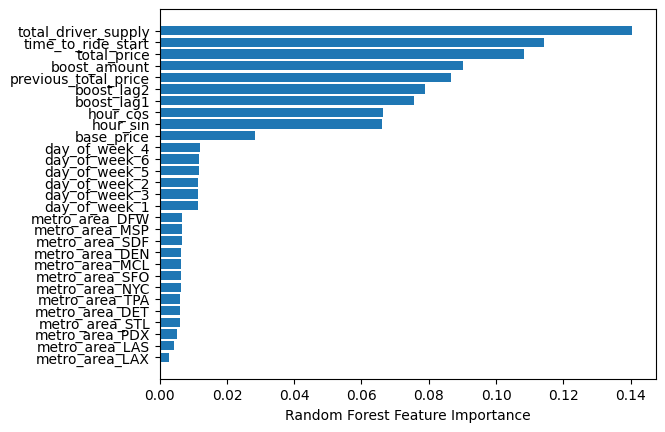

In [25]:
sorted_idx = feature_importances.argsort()

plt.barh(np.array(features)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

# Next Steps

1. Tune the model so that the probabilities of getting claimed next or not are more in line with what happened
2. Try other time series modeling (ARIMA, LSTM, etc)
3. Update boost values to see if probability of a ride getting claimed next increases
4. Balance amount of boost values to keep total price low with probability of getting claimed high